In [1]:
# Algoritmo de aprendizaje no supervisado

'''
un algoritmo no supervisado basado en la idea de vecinos más cercanos es el algoritmo K-Means. K-Means 
es un algoritmo de agrupamiento basado en particionar un conjunto de datos en 'K' grupos o clústeres.
'''

# Establece una variable de entorno para evitar una fuga de memoria para usuarios windows
import os
os.environ['OMP_NUM_THREADS'] = '1'

#Modulo para quitar warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#Importar bibliotecas y cargar datos
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Datos de columna X e Y
X_vals = [6.290303913, 6.278329421, 6.26393719, 6.250503559, 6.247197047, 6.23061541, 6.212712849, 6.315319592, 6.330537796, 6.337816543, 6.252978384, 6.253342459, 6.258716136, 6.256649006]
Y_vals = [-75.56469784, -75.56942353, -75.56334835, -75.56822247, -75.56970975, -75.57554709, -75.57801847, -75.55528241, -75.55338124, -75.54431178, -75.582943, -75.58827777, -75.59773582, -75.61341926]

data = pd.DataFrame({"X": X_vals, "Y": Y_vals})


In [2]:
# Preprocesar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [3]:
#Entrenar el modelo de K-Means
k = 3  # Número de clústeres
model = KMeans(n_clusters=k, n_init=10, random_state=42)
model.fit(data_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [4]:
#Obtener las etiquetas de clúster y los centroides
labels = model.labels_
centroids = model.cluster_centers_
inertia = model.inertia_

In [5]:
print('Labels: ', labels)
print('Centroids: ', centroids)
print('Inertia: ', inertia)

Labels:  [1 0 0 0 0 0 0 1 1 1 0 2 2 2]
Centroids:  [[-0.62007479  0.04013887]
 [ 1.3760185   1.06483893]
 [-0.38785015 -1.5134426 ]]
Inertia:  5.865228802450013


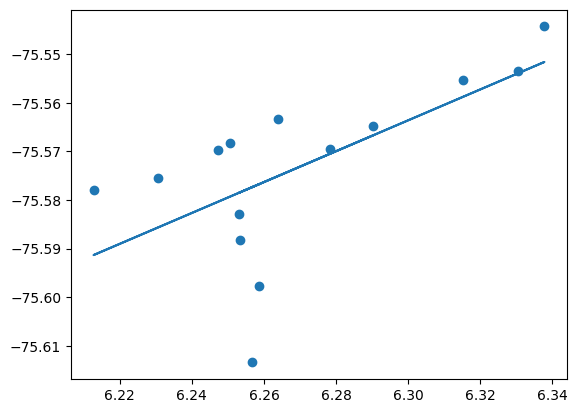

In [6]:
#Regresión Lineal

import matplotlib.pyplot as plt
from scipy import stats

X_vals = [6.290303913, 6.278329421, 6.26393719, 6.250503559, 6.247197047, 6.23061541, 6.212712849, 6.315319592, 6.330537796, 6.337816543, 6.252978384, 6.253342459, 6.258716136, 6.256649006]
Y_vals = [-75.56469784, -75.56942353, -75.56334835, -75.56822247, -75.56970975, -75.57554709, -75.57801847, -75.55528241, -75.55338124, -75.54431178, -75.582943, -75.58827777, -75.59773582, -75.61341926]

slope, intercept, r, p, std_err = stats.linregress(X_vals, Y_vals)

def mifuncion(X_vals):
    return slope * X_vals + intercept

mimodelo = list(map(mifuncion, X_vals))

plt.scatter(X_vals, Y_vals)
plt.plot(X_vals, mimodelo)
plt.show()


In [7]:
#Predecir valores futuros

from scipy import stats 

X_vals = [6.290303913, 6.278329421, 6.26393719, 6.250503559, 6.247197047, 6.23061541, 6.212712849, 6.315319592, 6.330537796, 6.337816543, 6.252978384, 6.253342459, 6.258716136, 6.256649006]
Y_vals = [-75.56469784, -75.56942353, -75.56334835, -75.56822247, -75.56970975, -75.57554709, -75.57801847, -75.55528241, -75.55338124, -75.54431178, -75.582943, -75.58827777, -75.59773582, -75.61341926]

slope, intercept, r, p, std_err = stats.linregress(X_vals, Y_vals)

def mifuncion(X_vals):
    return slope * X_vals + intercept

latitud = mifuncion(6.212712849)

print(latitud)

-75.59133119680094


In [ ]:
# Información sobre Regresión Lineal

'''Cuando un punto en el conjunto de datos está por debajo de la línea de regresión, 
significa que el valor real observado de la variable dependiente (y) para ese punto en particular 
es menor que el valor predicho por la línea de regresión. En otras palabras, el modelo de 
regresión lineal está sobreestimando ligeramente el valor de la variable dependiente en ese punto específico.'''

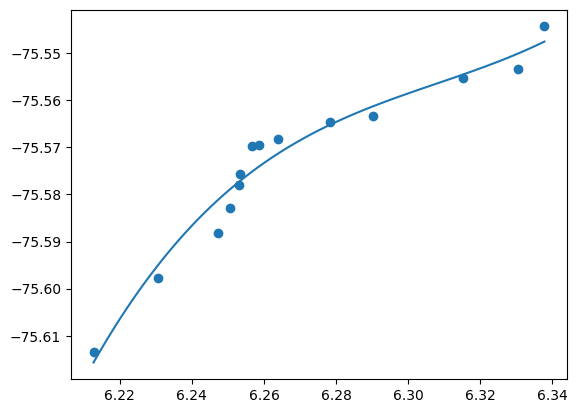

In [8]:
#Regresión Polinomial

import numpy
import matplotlib.pyplot as plt

X_vals = [6.212712849, 6.23061541, 6.247197047, 6.250503559, 6.252978384, 6.253342459, 6.256649006, 6.258716136, 6.26393719, 6.278329421, 6.290303913, 6.315319592, 6.330537796, 6.337816543]
Y_vals = [-75.61341926, -75.59773582, -75.58827777, -75.582943, -75.57801847, -75.57554709, -75.56970975, -75.56942353, -75.56822247, -75.56469784, -75.56334835, -75.55528241, -75.55338124, -75.54431178]

modelo = numpy.poly1d(numpy.polyfit(X_vals, Y_vals, 3))

linea = numpy.linspace(6.212712849, 6.337816543, 100)

plt.scatter(X_vals, Y_vals)
plt.plot(linea, modelo(linea))
plt.show()

In [10]:
#Predecir valores futuros
import numpy
from sklearn.metrics import r2_score

X_vals = [6.212712849, 6.23061541, 6.247197047, 6.250503559, 6.252978384, 6.253342459, 6.256649006, 6.258716136, 6.26393719, 6.278329421, 6.290303913, 6.315319592, 6.330537796, 6.337816543]
Y_vals = [-75.61341926, -75.59773582, -75.58827777, -75.582943, -75.57801847, -75.57554709, -75.56970975, -75.56942353, -75.56822247, -75.56469784, -75.56334835, -75.55528241, -75.55338124, -75.54431178]

modelo = numpy.poly1d(numpy.polyfit(X_vals,Y_vals,3))

print(r2_score(Y_vals, modelo(X_vals)))


0.9611011732829533


In [ ]:
# Explicación del resultado

'''
El resultado 0.96 muestra que hay una muy buena relación y podemos usar la regresión polinomial
en futuras predicciones
'''

In [ ]:
# Cuándo usar regresión lineal y cuándo regresión polinomial?

'''
La elección de usar regresión lineal o regresión polinomial depende en gran medida de la relación entre las variables 
y la naturaleza de los datos. A continuación, se describen las situaciones en las que utilizarías cada una:

Regresión lineal:

Utiliza la regresión lineal cuando la relación entre las variables independientes (predictores) y la variable 
dependiente (respuesta) es aproximadamente lineal.
La regresión lineal es simple, fácil de interpretar y computacionalmente eficiente. Es efectiva cuando 
las variables tienen una relación lineal clara y no hay mucha colinealidad entre las características.

Regresión polinomial:

Utiliza la regresión polinomial cuando la relación entre las variables independientes y la variable 
dependiente es más compleja y no se ajusta bien a una línea recta.
La regresión polinomial modela la relación utilizando un polinomio de grado n, lo que permite capturar 
relaciones no lineales y curvas en los datos.

Este enfoque es más flexible pero también más propenso al sobreajuste, especialmente a medida que aumenta 
el grado del polinomio. Por lo tanto, es importante analizar el modelo, la complejidad y los errores de 
validación cruzada para evitar el sobreajuste.

Para determinar cuál enfoque es el más apropiado, realiza un análisis exploratorio de los datos y crea 
gráficos de dispersión para visualizar la relación entre las variables. Si la relación parece ser lineal, 
prueba primero con la regresión lineal. Si la relación es más compleja o no lineal, considera la regresión 
polinomial. Además, analiza los errores y métricas del modelo (como el coeficiente de determinación R²) para 
evaluar qué modelo se ajusta mejor a tus datos.

'''
'''

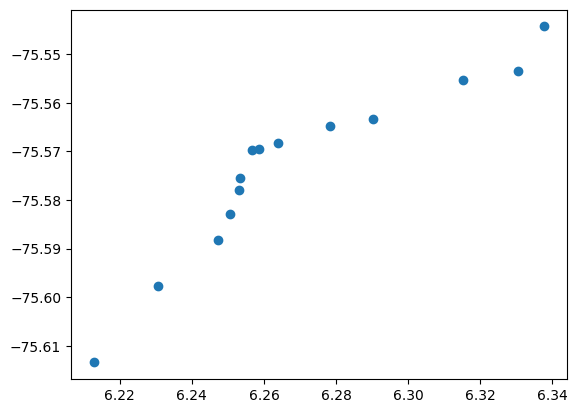

In [11]:
#Entrenamiento

import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

X_vals = [6.212712849, 6.23061541, 6.247197047, 6.250503559, 6.252978384, 6.253342459, 6.256649006, 6.258716136, 6.26393719, 6.278329421, 6.290303913, 6.315319592, 6.330537796, 6.337816543]
Y_vals = [-75.61341926, -75.59773582, -75.58827777, -75.582943, -75.57801847, -75.57554709, -75.56970975, -75.56942353, -75.56822247, -75.56469784, -75.56334835, -75.55528241, -75.55338124, -75.54431178]

plt.scatter(X_vals, Y_vals)
plt.show()

In [ ]:
'''
El eje x representa la longitud para ubicar un punto de la estación.

El eje y representa la latitud para ubicar un punto de la estación.
'''

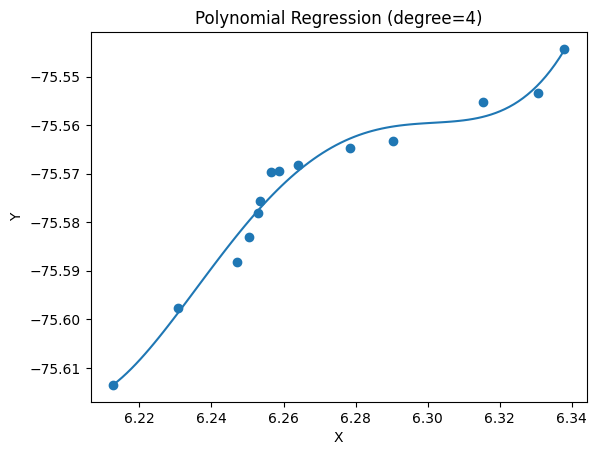

In [12]:
# Gráfica de regresión polinomial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X_vals = [6.212712849, 6.23061541, 6.247197047, 6.250503559, 6.252978384, 6.253342459, 6.256649006, 6.258716136, 6.26393719, 6.278329421, 6.290303913, 6.315319592, 6.330537796, 6.337816543]
Y_vals = [-75.61341926, -75.59773582, -75.58827777, -75.582943, -75.57801847, -75.57554709, -75.56970975, -75.56942353, -75.56822247, -75.56469784, -75.56334835, -75.55528241, -75.55338124, -75.54431178]

data = pd.DataFrame({"X": X_vals, "Y": Y_vals})
x = data[['X']].to_numpy().ravel()  # Convertir el DataFrame 'X' en un array 1D
y = data['Y']

# Ajustar el modelo polinomial
degree = 4
mymodel = np.poly1d(np.polyfit(x, y, degree))

# Crear una línea utilizando los límites correctos en el eje X (usar los valores mínimos y máximos de los datos)
myline = np.linspace(np.min(x), np.max(x), 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (degree=4)')
plt.show()

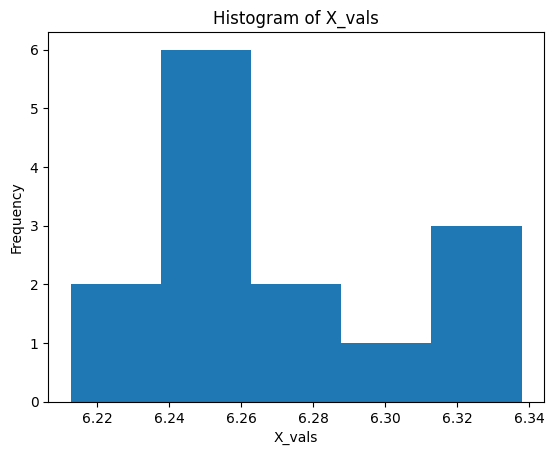

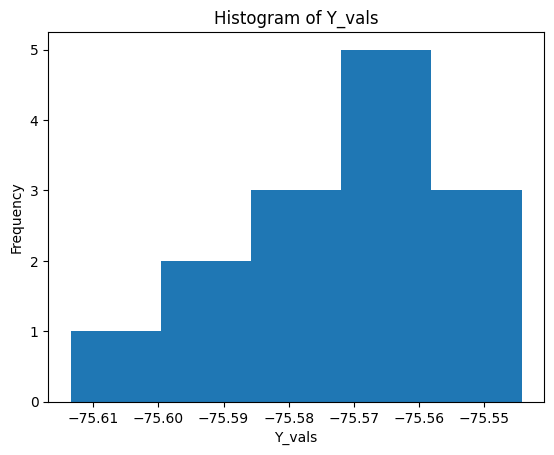

In [13]:
#Gráfico de Histograma:

import numpy as np
import matplotlib.pyplot as plt

X_vals = [6.290303913, 6.278329421, 6.26393719, 6.250503559, 6.247197047, 6.23061541, 6.212712849, 6.315319592, 6.330537796, 6.337816543, 6.252978384, 6.253342459, 6.258716136, 6.256649006]
Y_vals = [-75.56469784, -75.56942353, -75.56334835, -75.56822247, -75.56970975, -75.57554709, -75.57801847, -75.55528241, -75.55338124, -75.54431178, -75.582943, -75.58827777, -75.59773582, -75.61341926]

# Crear un histograma para X_vals
plt.hist(X_vals, bins=5)
plt.xlabel('X_vals')
plt.ylabel('Frequency')
plt.title('Histogram of X_vals')
plt.show()

# Crear un histograma para Y_vals
plt.hist(Y_vals, bins=5)
plt.xlabel('Y_vals')
plt.ylabel('Frequency')
plt.title('Histogram of Y_vals')
plt.show()

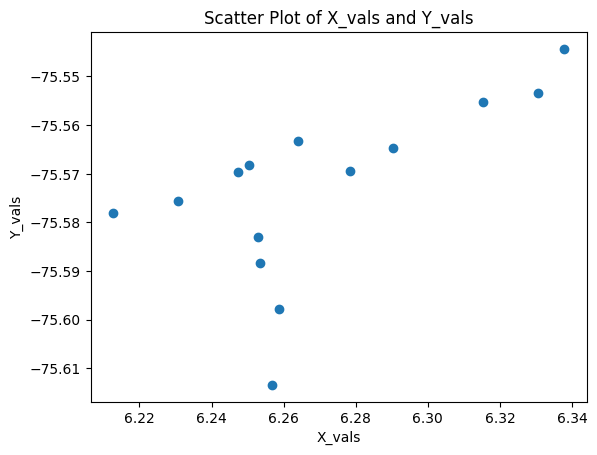

In [14]:
# Gráfico de dispersión

import numpy as np
import matplotlib.pyplot as plt

X_vals = [6.290303913, 6.278329421, 6.26393719, 6.250503559, 6.247197047, 6.23061541, 6.212712849, 6.315319592, 6.330537796, 6.337816543, 6.252978384, 6.253342459, 6.258716136, 6.256649006]
Y_vals = [-75.56469784, -75.56942353, -75.56334835, -75.56822247, -75.56970975, -75.57554709, -75.57801847, -75.55528241, -75.55338124, -75.54431178, -75.582943, -75.58827777, -75.59773582, -75.61341926]

plt.scatter(X_vals, Y_vals)
plt.xlabel('X_vals')
plt.ylabel('Y_vals')
plt.title('Scatter Plot of X_vals and Y_vals')
plt.show()